# Airbnb in Seattle 

**1. Importer les librairies et les trois datasets**

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,5)})

In [184]:
listings = pd.read_csv("./Datasets/listings.csv")
reviews = pd.read_csv("./Datasets/reviews.csv")

In [185]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [186]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


**2. Trouver un moyen de joindre le dataset `listings` & `reviews`**

In [187]:
merged_df = pd.merge(
    listings, 
    reviews,
    left_on="id",
    right_on="listing_id",
    how="inner"
)

In [188]:
merged_df.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',

**3. Essayons de voir ce qui influence le prix d'un appartement Airbnb à Seattle** 

**Regardez tout d'abord la distribution des prix** 

In [23]:
type(merged_df.price[0])

str

In [27]:
merged_df["price"].count()

84849

In [36]:
merged_df["price"].str.contains("$").count()

84849

In [39]:
merged_df["price"] = merged_df["price"].str.replace("$", "")

In [42]:
merged_df["price"] = merged_df["price"].str.replace(",", "")

In [44]:
merged_df["price"] = merged_df["price"].apply(float)

In [46]:
type(merged_df["price"][0])

numpy.float64

In [60]:
type(merged_df.weekly_price[0])

float

In [61]:
type(merged_df.monthly_price[0])

float

In [189]:
def clean_and_convert(column):
    replace_values = column.str.replace("$", "")
    replace_values = replace_values.str.replace(",", "")
    return replace_values.apply(float)


# CORRECTION:
# def clean_price(price):
#  p_without_dollar_sign = p[1:]
#  p_without_comma = p_without_dollar_sign.replace(",", "")
#  p_as_as_number = float(p_without_comma)
#  return p_without_dollar_sign

In [190]:
listings.price = clean_and_convert(listings.price)

In [193]:
listings.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
5       120.0
6        80.0
7        60.0
8        90.0
9       150.0
10       95.0
11       99.0
12      245.0
13      165.0
14      461.0
15      109.0
16       66.0
17       99.0
18      200.0
19      700.0
20      110.0
21       99.0
22      450.0
23       75.0
24      600.0
25      450.0
26      150.0
27       45.0
28      300.0
29       80.0
        ...  
3788    115.0
3789     60.0
3790    175.0
3791     85.0
3792    109.0
3793    109.0
3794    107.0
3795    200.0
3796     85.0
3797     70.0
3798     77.0
3799     65.0
3800    185.0
3801    108.0
3802    200.0
3803    250.0
3804    125.0
3805    100.0
3806    160.0
3807    109.0
3808    175.0
3809    120.0
3810    154.0
3811     65.0
3812     95.0
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

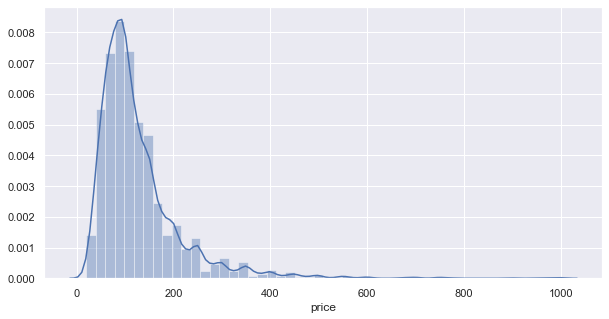

In [194]:
sns.distplot(listings.price)

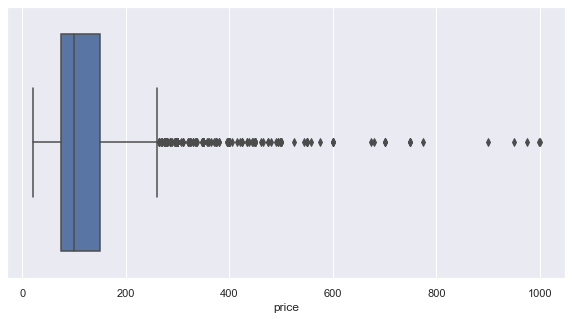

In [195]:
sns.boxplot(listings.price)

In [100]:
max(listings.price)

1000.0

(0, 1010)

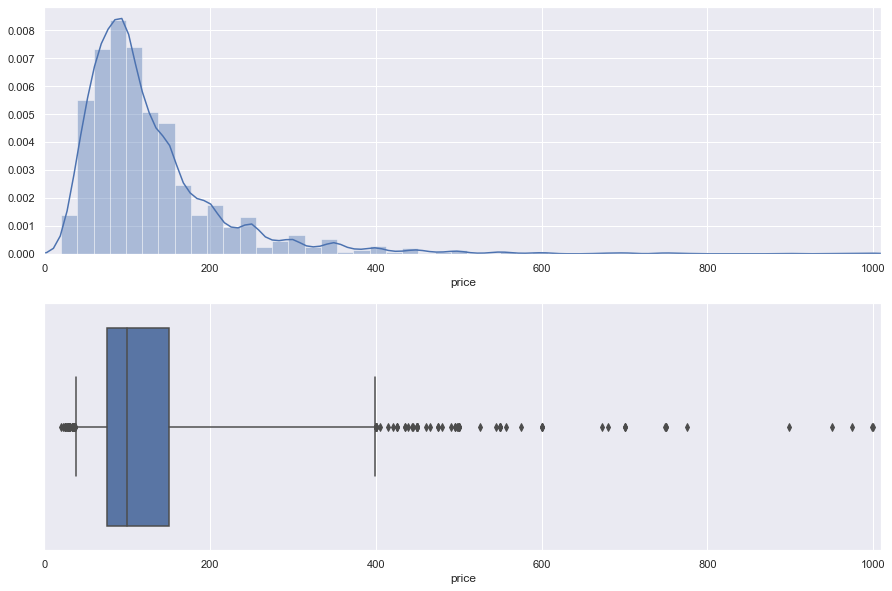

In [196]:
fig, ax = plt.subplots(nrows = 2, figsize = (15, 10))

sns.distplot(listings.price, ax = ax[0])
sns.boxplot(listings.price, ax = ax[1], whis = [2, 98])   # whis sert pour les outliers

ax[0].set_xlim(0,1010)
ax[1].set_xlim(0,1010)

**4. On voit très clairement des outliers dans ces prix. Créez un nouveau dataset avec uniquement les appartement qui on un prix maximum à 400$ / nuit**

In [88]:
(listings.price <= 400).sum()

3755

In [89]:
(listings.price > 400).sum()

63

In [197]:
cheap_df = listings[listings.price <= 400]

In [198]:
len(cheap_df) / len(listings)

0.9834992142482976

(0, 450)

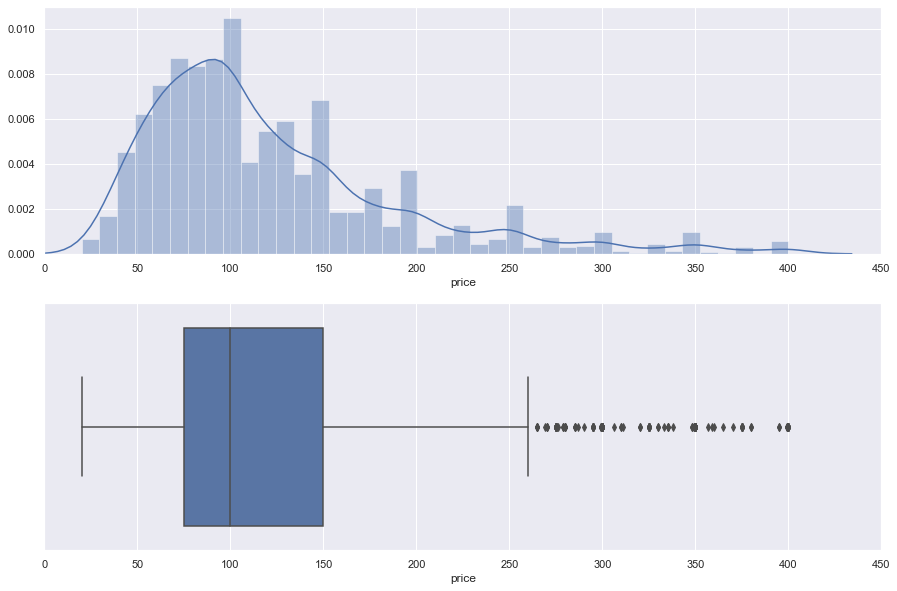

In [119]:
fig, ax = plt.subplots(nrows = 2, figsize = (15, 10))

sns.distplot(cheap_df.price, ax = ax[0])
sns.boxplot(cheap_df.price, ax = ax[1])

ax[0].set_xlim(0,450)
ax[1].set_xlim(0,450)

In [70]:
cheap_df.price.describe()

count    84276.000000
mean       105.613555
std         53.767253
min         22.000000
25%         70.000000
50%         93.000000
75%        125.000000
max        400.000000
Name: price, dtype: float64

In [110]:
cheap_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.755000e+03,3.755000e+03,3.755000e+03,3753.000000,3753.000000,3755.000000,3755.000000,3755.000000,3739.000000,3749.000000,...,3119.000000,3108.000000,3113.000000,3108.000000,3115.000000,3111.000000,3110.000000,0.0,3755.000000,3138.000000
mean,5.556910e+06,2.016010e+13,1.579411e+07,7.146283,7.146283,47.628887,-122.332935,3.272703,1.236026,1.270739,...,94.517153,9.635135,9.552843,9.784106,9.807705,9.607522,9.452412,NaN,2.944607,2.096539
std,2.966011e+06,0.000000e+00,1.459490e+07,28.711382,28.711382,0.043270,0.031759,1.868531,0.556459,0.824873,...,6.597540,0.700417,0.801180,0.599360,0.571147,0.629853,0.749495,NaN,5.882812,1.827941
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.256584e+06,2.016010e+13,3.258368e+06,1.000000,1.000000,47.609078,-122.354154,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.700000
50%,6.127974e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623451,-122.328750,2.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.560000
75%,8.047928e+06,2.016010e+13,2.592334e+07,3.000000,3.000000,47.662976,-122.310698,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.020000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


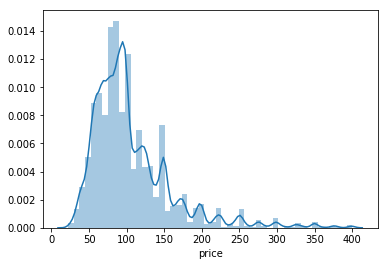

**5. Calculez la proportion d'appartement que vous avez gardé dans le nouveau dataset par rapport à l'ancien**

In [120]:
percent_400 = len(cheap_df) * 100 / len(listings)
percent_400

98.34992142482976

0.993246826715695

**6. Pour l'instant nous allons continuer sur ce dataset qui nous semble plus pertinant** 

**Regardez si le quartier a une influence sur les prix. On utilisera la colonne *neighbourhood_group_cleansed***

[Text(0, 0.5, 'Price per night'), Text(0.5, 0, 'Neighbourhood')]

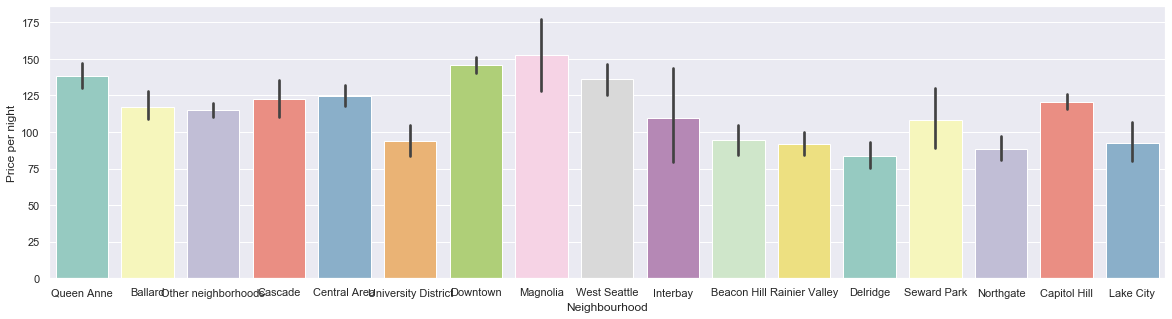

In [205]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(x="neighbourhood_group_cleansed", y="price", data=cheap_df, palette="Set3")
ax.set(xlabel='Neighbourhood', ylabel='Price per night')

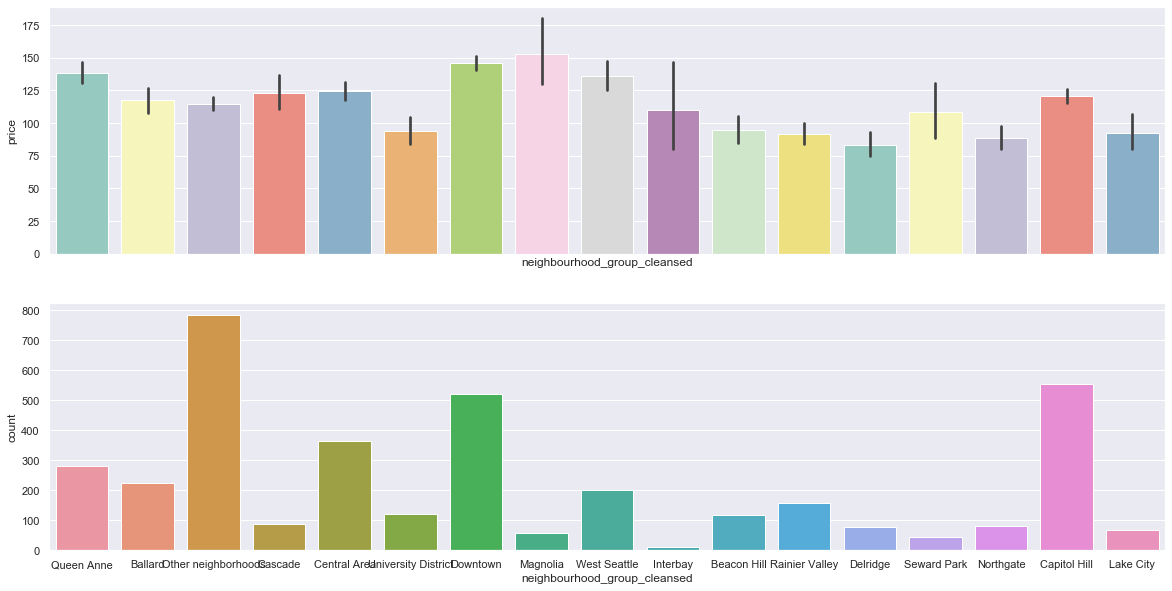

In [208]:
fig, ax = plt.subplots(nrows = 2, figsize = (20, 10), sharex= True)
sns.barplot(x="neighbourhood_group_cleansed", y="price", data=cheap_df, palette="Set3", ax = ax[0])
sns.countplot(x="neighbourhood_group_cleansed", data=cheap_df, ax = ax[1])

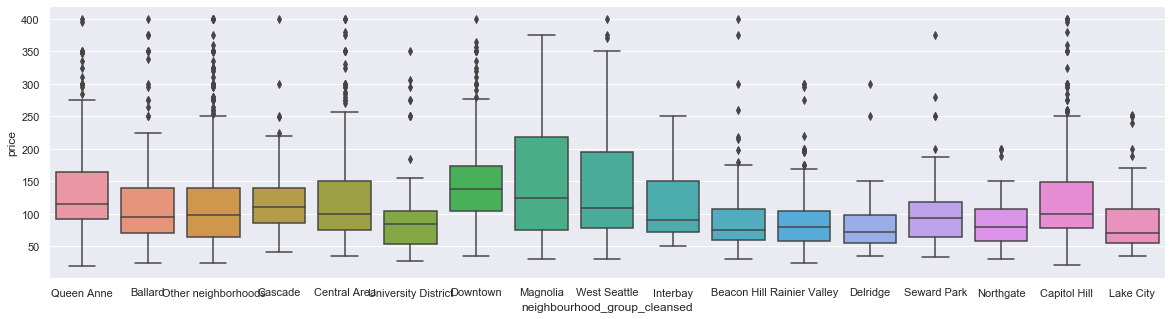

In [299]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.boxplot(x="neighbourhood_group_cleansed", y="price", data=cheap_df)

**Regardez de même avec le type de propriété**

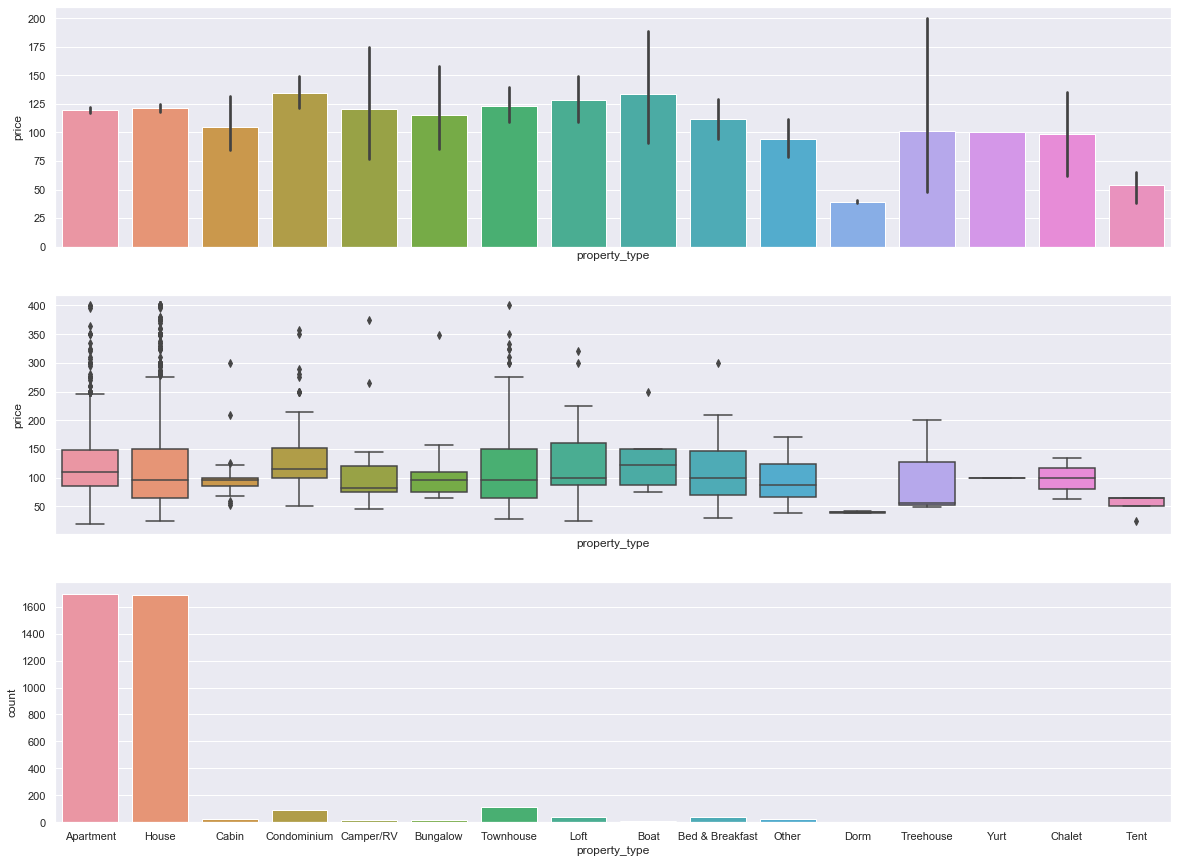

In [212]:
fig, ax = plt.subplots(nrows = 3, figsize = (20, 15), sharex= True)
sns.barplot(x="property_type", y="price", data=cheap_df, ax = ax[0])
sns.boxplot(x="property_type", y="price", data=cheap_df, ax = ax[1])
sns.countplot(x="property_type", data=cheap_df, ax = ax[2])

**Regardez cette fois les prix par rapport au type de chambre**

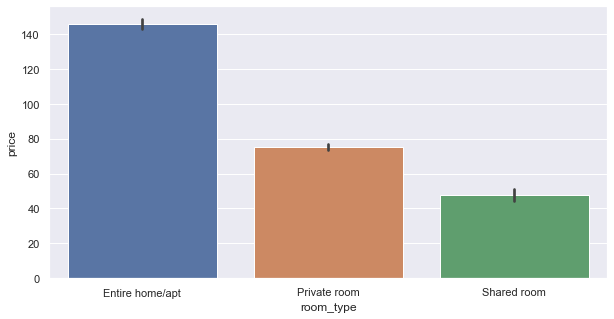

In [134]:
sns.barplot(cheap_df.room_type, cheap_df.price)

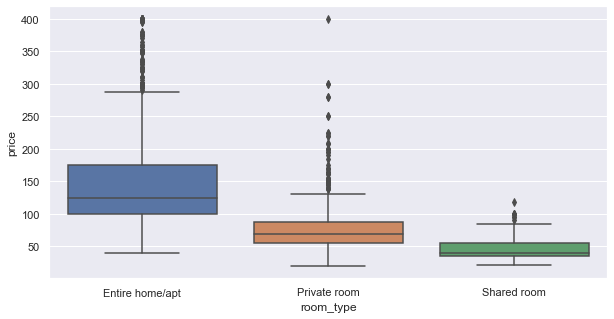

In [213]:
sns.boxplot(cheap_df.room_type, cheap_df.price)
# on voit que les tariffes plus elevés sont pour les Apartment, donc plus rentables

**On pourrait se demander si le temps de réponse du _Host_ aurait une influence sur le prix. Vérifiez le**

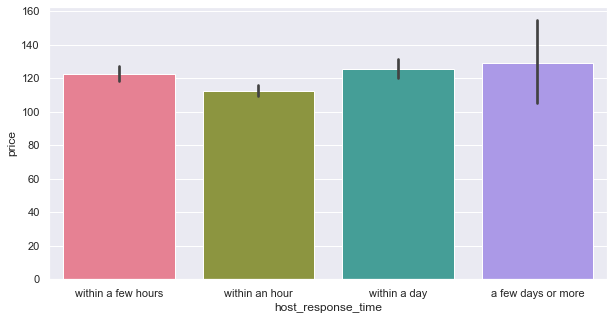

In [138]:
sns.barplot(cheap_df.host_response_time, cheap_df.price, palette="husl")

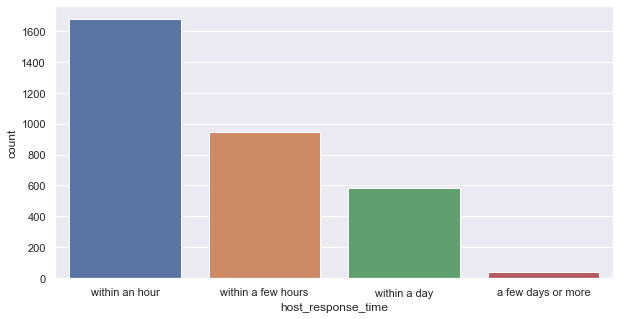

In [219]:
sns.countplot(cheap_df.host_response_time, order = ["within an hour", 'within a few hours', 'within a day', 'a few days or more'])

In [218]:
cheap_df.host_response_time.unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

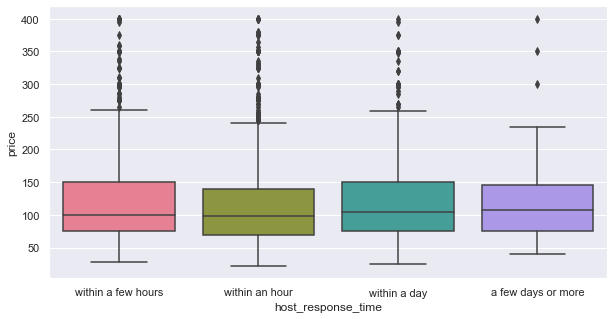

In [220]:
sns.boxplot(cheap_df.host_response_time, cheap_df.price, palette="husl")

# pas bcp de differences

**Ce graphique semble être intéressant et surtout. Regardez de plus près la distribution des prix des _host_ qui répondent _within few days or more_**

In [148]:
#cheap_df.host_response_time

In [221]:
df_few_hours = cheap_df[cheap_df.host_response_time == "a few days or more"]

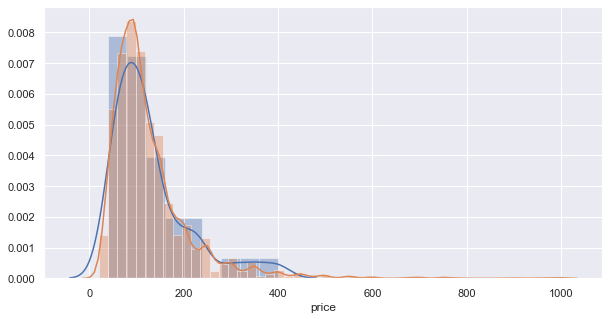

In [223]:
sns.distplot(df_few_hours.price)
sns.distplot(listings.price)

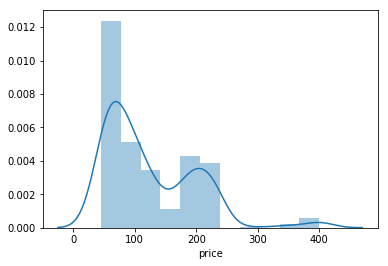

**Il semblerait en effet que les host qui répondent lentement soient dans la moyenne haute des prix. Cependant, cela ne veut pas dire que l'expérience des clients soit bonne. Nous regarderons les reviews juste ensuite.** 

**Avant cela, regardons l'influence du fait d'être _super host_ sur les prix**


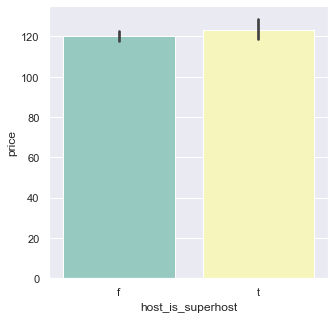

In [164]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.barplot(cheap_df.host_is_superhost, cheap_df.price, palette="Set3")

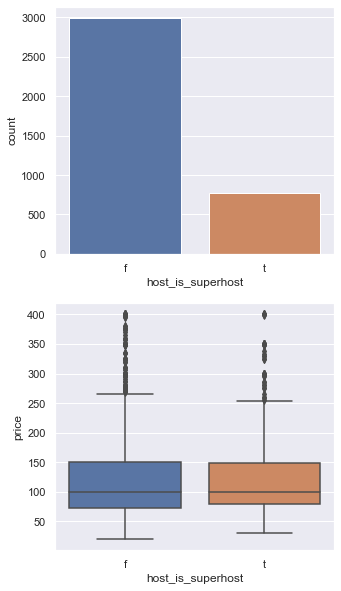

In [232]:
fig, ax = plt.subplots(nrows = 2, figsize = (5, 10))
sns.countplot(cheap_df.host_is_superhost, ax = ax[0])
sns.boxplot(cheap_df.host_is_superhost, cheap_df.price, ax = ax[1])

# le prix n'est pas trop influencé si il s'agit d'un superhost ou pas

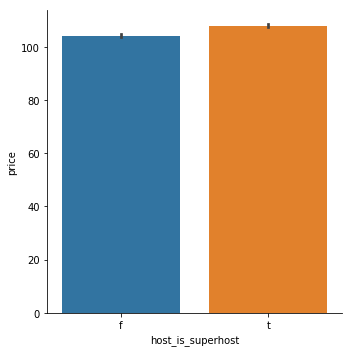

**Regardons cette fois l'influence de la maison en elle-même sur le prix d'un Airbnb** 

**Regardez l'influence des prix par rapport au nombre de lits, de chambres, de salles de bains et du nombre de personnes possibles dans le logement**

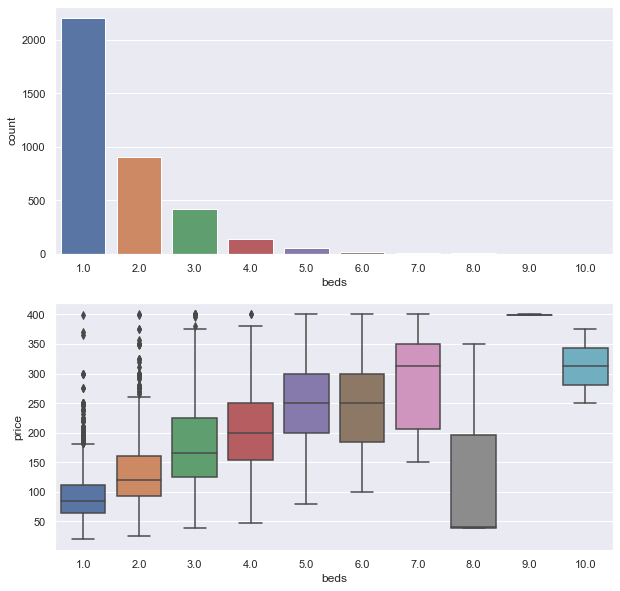

In [236]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 10))
sns.countplot(cheap_df.beds, ax = ax[0])
sns.boxplot(cheap_df.beds, cheap_df.price, ax = ax[1])

# pour le nombre de lit on a un croissance du prix

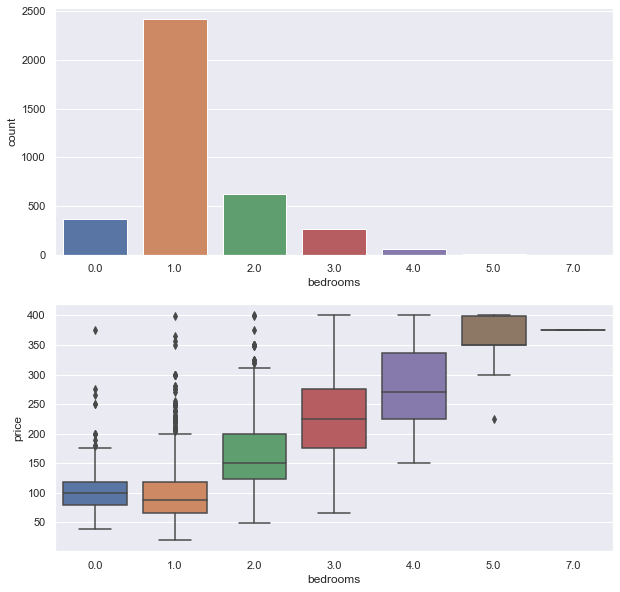

In [237]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 10))
sns.countplot(cheap_df.bedrooms, ax = ax[0])
sns.boxplot(cheap_df.bedrooms, cheap_df.price, ax = ax[1])

# pour le nombre de lit on a un croissance du prix

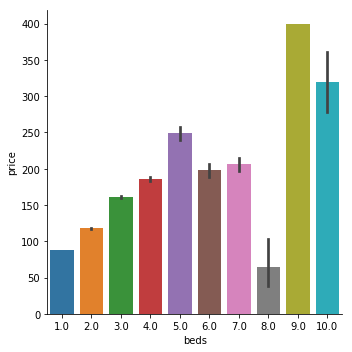

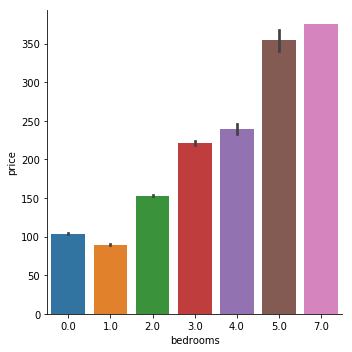

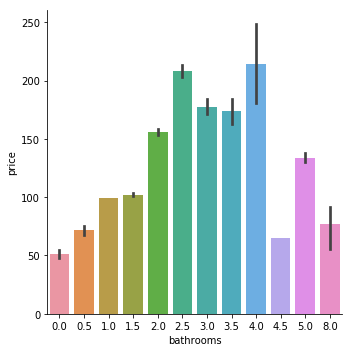

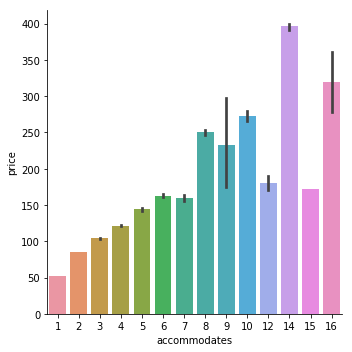

**Enfin, nous aimerions voir si les _amenities_ ont une influence sur le prix. Pour cela, nous ne pouvons pas utiliser les valeurs telles quelles dans le dataset. Trouvez donc un moyenne de les parser pour les mettre dans seaborn**


In [242]:
def count_amenities(string):
    return len(string.split(","))

cheap_df.amenities = cheap_df.amenities.apply(count_amenities)

In [244]:
cheap_df.amenities

0       10
1       16
3       14
5        6
6        7
7        7
8       15
9       16
10      21
11      12
12      17
13      16
15      13
16      14
17       8
18      20
20      11
21      12
23      20
26      13
27       6
28      18
29      14
30      14
31      13
32      16
33      16
34      19
35      16
36      14
        ..
3788    20
3789    11
3790    18
3791     9
3792    19
3793    13
3794     7
3795    15
3796    15
3797    13
3798    19
3799    16
3800    16
3801    17
3802    12
3803    21
3804    16
3805    15
3806    10
3807    12
3808    17
3809     9
3810    22
3811    15
3812    19
3813    16
3814    17
3815    20
3816    11
3817    22
Name: amenities, Length: 3755, dtype: int64

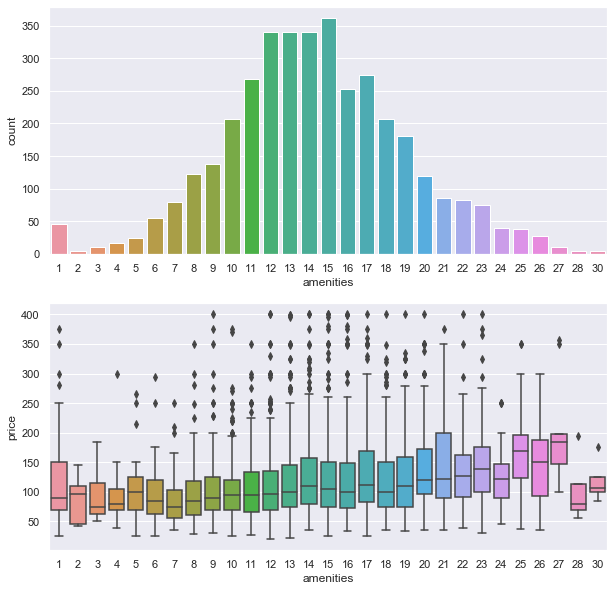

In [245]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 10))
sns.countplot(cheap_df.amenities, ax = ax[0])
sns.boxplot(cheap_df.amenities, cheap_df.price, ax = ax[1])

**7. Attaquons maintenant les reviews, il semblerait bon de commencer par la distribution des reviews**

(70, 100)

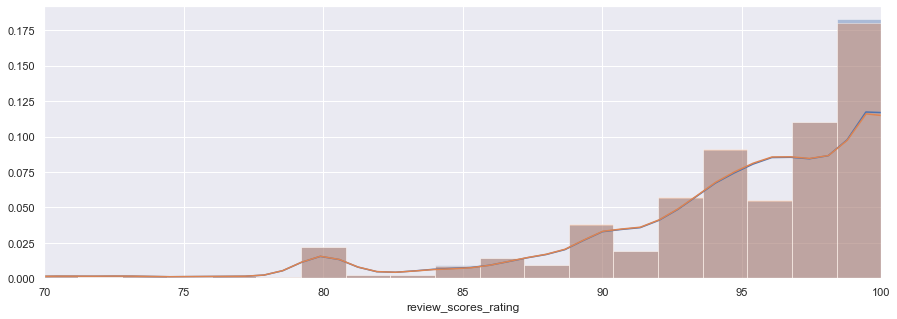

In [290]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.distplot(listings.review_scores_rating.dropna())
sns.distplot(cheap_df.review_scores_rating.dropna())
plt.xlim(70,100)

# la distribution n'est pas très changé

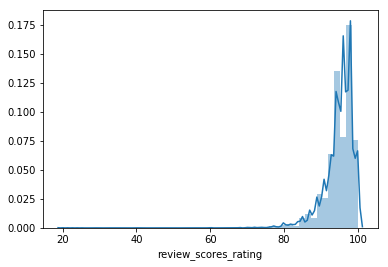

la review moyenne du dataset est de 94.88823480541676


**Nous avons pris la moyenne sur le dataset sans les outliers. Prenez les dataset complet et regardez si vous voyez une différence**

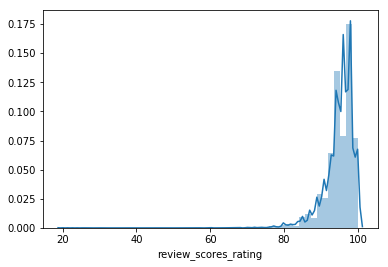

la review moyenne du dataset complet est de 94.89636798736281


**8. On peut voir que les notes sont extrêmement élevée pour la plupart des biens. Mais voyons si nous pouvons trouver des facteurs qui influencent une meilleure review**

**Commencez par regarder la *cancellation_policy* sur les reviews**

In [246]:
cheap_df.cancellation_policy

0       moderate
1         strict
3       flexible
5         strict
6       moderate
7         strict
8         strict
9         strict
10      moderate
11        strict
12      moderate
13        strict
15        strict
16      moderate
17      moderate
18      flexible
20      flexible
21      moderate
23      flexible
26      flexible
27        strict
28      moderate
29        strict
30        strict
31        strict
32      flexible
33        strict
34        strict
35      moderate
36        strict
          ...   
3788      strict
3789    flexible
3790      strict
3791    moderate
3792    flexible
3793      strict
3794    flexible
3795    flexible
3796    moderate
3797      strict
3798      strict
3799    moderate
3800      strict
3801    moderate
3802    flexible
3803    moderate
3804      strict
3805      strict
3806    flexible
3807      strict
3808      strict
3809      strict
3810      strict
3811    moderate
3812    moderate
3813      strict
3814    moderate
3815    modera

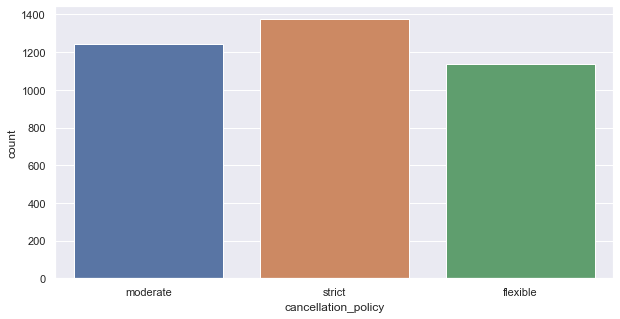

In [267]:
sns.countplot(cheap_df.cancellation_policy)

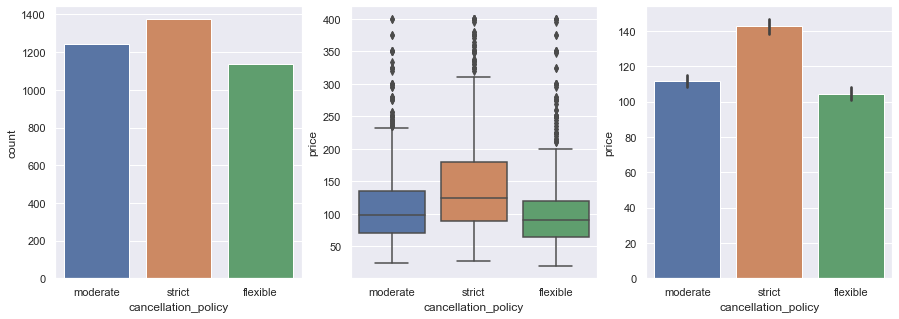

In [268]:
fig, ax = plt.subplots(ncols = 3, figsize = (15, 5))
sns.countplot(cheap_df.cancellation_policy, ax = ax[0])
sns.boxplot(cheap_df.cancellation_policy, cheap_df.price, ax = ax[1])
sns.barplot(cheap_df.cancellation_policy, cheap_df.price, ax = ax[2])

(80, 100)

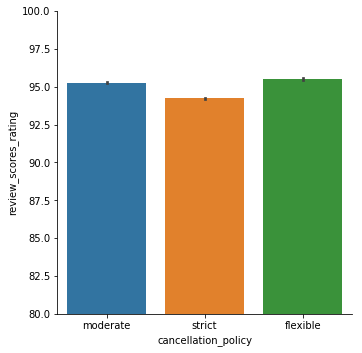

**9. Est ce que le nombre de reviews peut influencer le score de chacun des biens ?** 

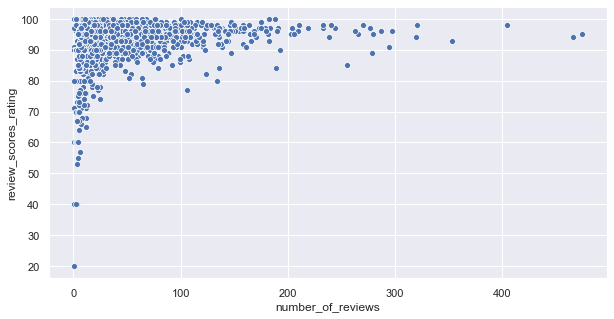

In [269]:
sns.scatterplot(cheap_df.number_of_reviews, cheap_df.review_scores_rating)

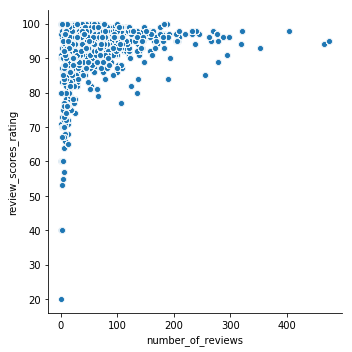

**10. Nous avions vu tout à l'heure que les personnes qui mettaient du temps à répondre avaient tendance à pratiquer des prix plus élevés. Est ce que pour autant ceux-ci ont des bonnes reviews ?**

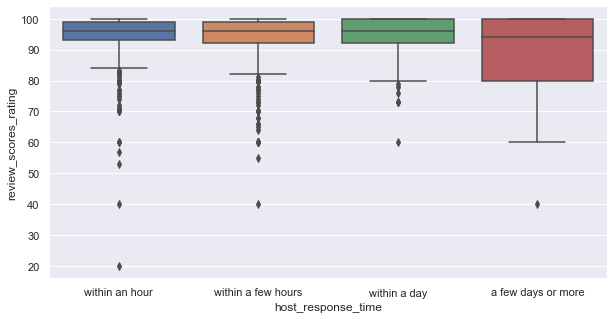

In [274]:
sns.boxplot(cheap_df.host_response_time,
            cheap_df.review_scores_rating,
            order = ["within an hour", 'within a few hours', 'within a day', 'a few days or more'])

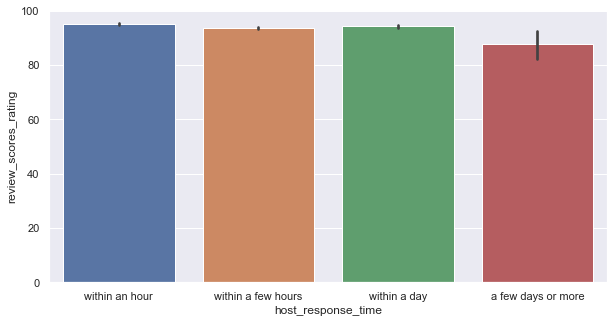

In [291]:
sns.barplot(cheap_df.host_response_time,
            cheap_df.review_scores_rating,
            order = ["within an hour", 'within a few hours', 'within a day', 'a few days or more'])

In [292]:
# on peut ajouter des analyses du p-value

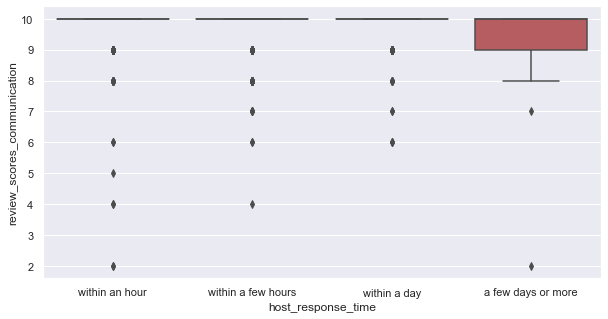

In [293]:
sns.boxplot(cheap_df.host_response_time,
            cheap_df.review_scores_communication,
            order = ["within an hour", 'within a few hours', 'within a day', 'a few days or more'])

**11. Bravo ! Vous avez fait une étude très approfondie du marché de l'immobilier Airbnb à Seattle. Ceci n'a pas été vain, imaginez maintenant que vous avez été mandaté par un propriétaire qui souhaite mettre sur appartement sur Airbnb.**

**Quelles seraient vos recommandations ?**

1. Il faut repondre vite aux locataires, parce que si on reponds après plusieurs jours on aura peut-etre un rating plus bas
2. Les apartment entier sont plus rentables des shared rooms
3. Dans le Magnolia neighnborhood, les prix sont plus chers mais il y a moins d'apart => moins de competitions => possibile de rentabilisé (mais faut voir si le quartier est recherché)
4. La cancellation policy n'influence pas beaucoup le ratings (mais c'est mieux une policy flexible ou moderate)
5. Les apart avec cancellation policy "strict" sont plus cher donc peut-etre "strict" parce que peut-etre plus difficile à louer. Les apart "moderate" sont moins cher et donc plus facile à louer (croiser avec autres données)
6. Les guests vont nous donner des mauvaise notes sur la communication (pour le dernier graph)

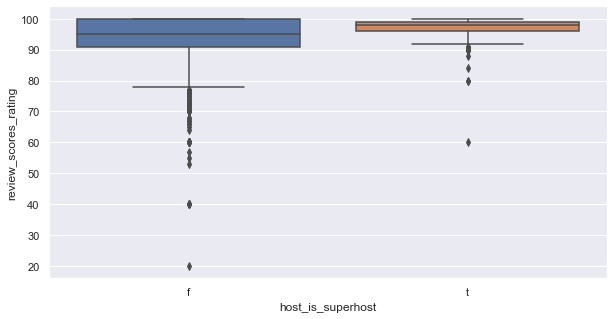

In [300]:
sns.boxplot(cheap_df.host_is_superhost,
            cheap_df.review_scores_rating)

# là on voit pas bcp de differences donc on va calcueler le p-value

In [301]:
cheap_df = cheap_df[- cheap_df.host_is_superhost.isna()]
cheap_df = cheap_df[- cheap_df.review_scores_rating.isna()]

In [302]:
len(cheap_df)

3119

In [303]:
listings_superhost = cheap_df[cheap_df.host_is_superhost == "t"]
listings_regular = cheap_df[cheap_df.host_is_superhost == "f"]

In [306]:
n_regular = len(listings_regular)
moy_regular = listings_regular.review_scores_rating.mean()

In [314]:
moy_regular

93.62321278385198

In [307]:
n_superhost = len(listings_superhost)
moy_superhost = listings_superhost.review_scores_rating.mean()

In [313]:
moy_superhost

97.3859649122807

In [308]:
delta_observé = moy_superhost - moy_regular

In [309]:
delta_observé

3.7627521284287155

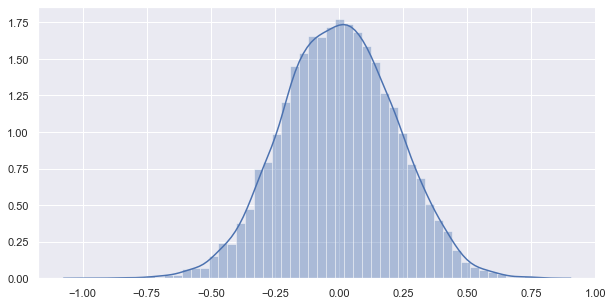

In [325]:
deltas = []

for i in range(10000):

    simulated_sample_superhost = cheap_df.sample(n_superhost)
    simulated_sample_regular = cheap_df.sample(n_regular)

    moy_regular_new = simulated_sample_regular.review_scores_rating.mean()
    moy_superhost_new = simulated_sample_superhost.review_scores_rating.mean()

    delta_observé_simulated = moy_superhost_new - moy_regular_new
    deltas.append(delta_observé_new)
    
sns.distplot(deltas)

In [336]:
delta_observé_new

-0.49547925257279246

In [337]:
p_value = len([d for d in deltas if d > delta_observé])/len(deltas)

In [338]:
p_value

0.0